## Reto 1: Boxplots

### 1. Objetivos:
    - Aprender a graficar e interpretar boxplots utilizando Seaborn
    - Aprender a lidiar con valores atípicos usando IQR-Score

---
    
### 2. Desarrollo:

#### a) Usando boxplots para analizar la distribución de nuestros datos

Vamos a hacer algunas gráficas de boxplot y describirlas en equipo. Usa Seaborn para generar gráficas boxplot de los siguientes datasets y columnas:

1. Dataset: 'near_earth_objects-jan_feb_1995-clean.csv'
    - Columnas a graficar: 'estimated_diameter.meters.estimated_diameter_max' y 'relative_velocity.kilometers_per_second'
2. Dataset: 'new_york_times_bestsellers-clean.json'
    - Columnas a graficar: 'price.numberDouble'
3. Dataset: 'melbourne_housing-clean.csv'
    - Columnas a graficar: 'land_size'
    
> Para conocer más detalles acerca de estos datasets, ve a Datasets/Readme.md y visita los links de las fuentes de donde provienen. Es una gran idea hacer esto para que entiendas el contexto alrededor de los análisis que vamos a estar realizando.
    
Realiza estas 4 visualizaciones y comenta con la experta y tus compañeros qué conclusiones o hipótesis podemos hacer sobre nuestros datos. Para profundizar en el análisis puedes obtener también el rango, la mediana, el valor mínimo y máximo, el percentil 25 y el percentil 75. De esta manera tendrás valores concretos con los que realizar tu análisis.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<Axes: xlabel='relative_velocity.kilometers_per_second'>

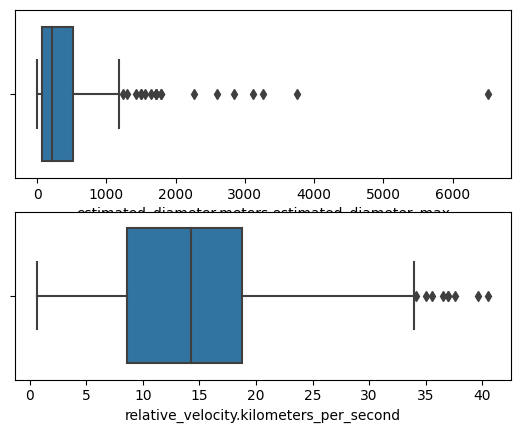

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataScience/Remoto Datasets/Remoto near_earth_objects-jan_feb_1995-clean.csv')
obj = df[['estimated_diameter.meters.estimated_diameter_max', 'relative_velocity.kilometers_per_second']]

plt.subplot(211)
sn.boxplot(x=obj['estimated_diameter.meters.estimated_diameter_max'], whis=1.5)
plt.subplot(212)
sn.boxplot(x=obj['relative_velocity.kilometers_per_second'])

The objects' diameters are mainly concentrated below the 500 m, with some atypical values over the thousands of meters.

In terms of their velocities, most of them are in the 8 to 18 km/s, with their atypical values over the 34 km/s.

<Axes: xlabel='price.numberDouble'>

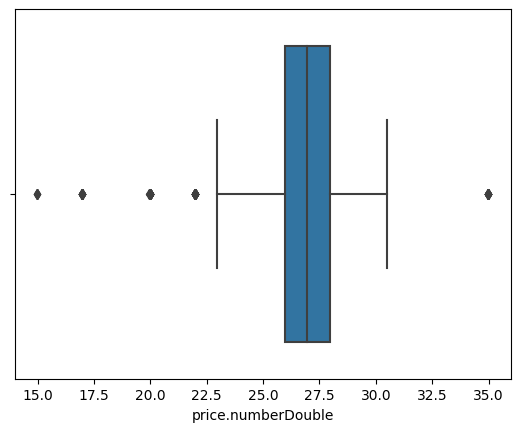

In [ ]:
df1 = pd.read_json('/content/drive/MyDrive/DataScience/Remoto Datasets/Remoto new_york_times_bestsellers-clean.json')
price = df1['price.numberDouble']

sn.boxplot(x=price)

Most prices are around 27, with some atypical values at 35 and below 22

<Axes: >

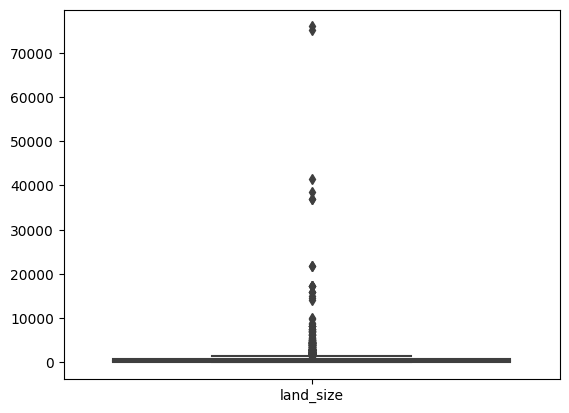

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/DataScience/Remoto Datasets/Remoto melbourne_housing-clean.csv')
landSz = df2[['land_size']]

sn.boxplot(landSz)

In [ ]:
Most values are way below 10000, with atypical values going over 70000

#### b) Eliminando valores atípicos

A partir de las visualizaciones que realizaste en el punto anterior, decide en cuáles columnas tenemos valores atípicos que pueden estorbarnos en nuestro análisis. Elimina dichos valores atípicos usando el Score de Rango Intercuartílico. Puedes probar variando un poco la medida del Score (1.5 * IQR) para eliminar solamente los valores que tú consideras como extremos.

Para observar los cambios a detalle, obtén la mediana, la media y la desviación estándar de tus datos *antes* y *después* de eliminar los valores atípicos. Compara estos valores y explica qué es lo que está pasando.

Grafica de nuevo tus datos sin valores atípicos para compararlos con las gráficas anteriores.

Comenta con la experta y tus compañeros tus hallazgos.

<Axes: xlabel='relative_velocity.kilometers_per_second'>

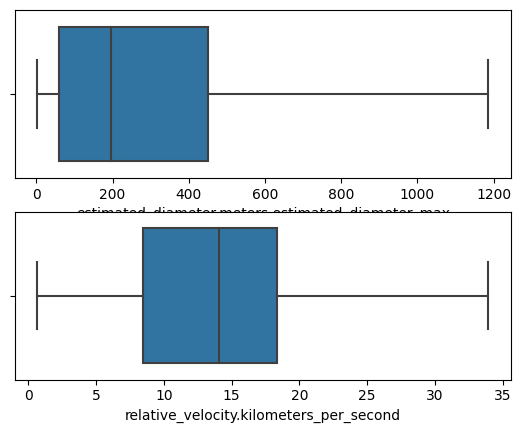

In [ ]:
#Diameter
aux = obj[['estimated_diameter.meters.estimated_diameter_max']]

Q1 = aux.quantile(.25)
Q3 = aux.quantile(.75)
IQR = Q3 - Q1

objTyp = aux[(aux>=Q1-1.5*IQR) & (aux<=Q3+1.5*IQR)]

#Velocity
aux = obj[['relative_velocity.kilometers_per_second']]

Q1 = aux.quantile(.25)
Q3 = aux.quantile(.75)
IQR = Q3 - Q1

objTyp['relative_velocity.kilometers_per_second'] = aux[(aux>=Q1-1.5*IQR) & (aux<=Q3+1.5*IQR)]

plt.subplot(211)
sn.boxplot(x=objTyp['estimated_diameter.meters.estimated_diameter_max'], whis=2)
plt.subplot(212)
sn.boxplot(x=objTyp['relative_velocity.kilometers_per_second'], whis=2)

In [ ]:
aux = price

Q1 = aux.quantile(.25)
Q3 = aux.quantile(.75)
IQR = Q3 - Q1

priceTyp = aux[(aux>=Q1-1.5*IQR) & (aux<=Q3+1.5*IQR)]

In [ ]:
aux = landSz

Q1 = aux.quantile(.25)
Q3 = aux.quantile(.75)
IQR = Q3 - Q1

landSzTyp = aux[(aux>=Q1-1.5*IQR) & (aux<=Q3+1.5*IQR)]

In [ ]:
#Diameter
mean_neoDiameter_before = obj['estimated_diameter.meters.estimated_diameter_max'].mean()
median_neoDiameter_before = obj['estimated_diameter.meters.estimated_diameter_max'].quantile(.5)
std_neoDiameter_before = obj['estimated_diameter.meters.estimated_diameter_max'].std()

mean_neoDiameter_after = objTyp['estimated_diameter.meters.estimated_diameter_max'].mean()
median_neoDiameter_after = objTyp['estimated_diameter.meters.estimated_diameter_max'].quantile(.5)
std_neoDiameter_after = objTyp['estimated_diameter.meters.estimated_diameter_max'].std()

#Velocity
mean_neoVelocity_before = obj['relative_velocity.kilometers_per_second'].mean()
median_neoVelocity_before = obj['relative_velocity.kilometers_per_second'].quantile(.5)
std_neoVelocity_before = obj['relative_velocity.kilometers_per_second'].std()

mean_neoVelocity_after = objTyp['relative_velocity.kilometers_per_second'].mean()
median_neoVelocity_after = objTyp['relative_velocity.kilometers_per_second'].quantile(.5)
std_neoVelocity_after = objTyp['relative_velocity.kilometers_per_second'].std()

#Price
mean_price_before = price.mean()
median_price_before = price.quantile(.5)
std_price_before = price.std()

mean_price_after = priceTyp.mean()
median_price_after = priceTyp.quantile(.5)
std_price_after = priceTyp.std()

#Land size
mean_land_before = landSz.mean()
median_land_before = landSz.quantile(.5)
std_land_before = landSz.std()

mean_land_after = landSzTyp.mean()
median_land_after = landSzTyp.quantile(.5)
std_land_after = landSzTyp.std()

In [ ]:
#Diameter
d_diameter = {'Before': {'Mean': mean_neoDiameter_before,'Median': median_neoDiameter_before, 'STD': std_neoDiameter_before}, 'After': {'Mean': mean_neoDiameter_after,'Median': median_neoDiameter_after, 'STD': std_neoDiameter_after}}
df_diameter = pd.DataFrame(d_diameter)

#Velocity
d_velocity = {'Before': {'Mean': mean_neoVelocity_before,'Median': median_neoVelocity_before, 'STD': std_neoVelocity_before}, 'After': {'Mean': mean_neoVelocity_after,'Median': median_neoVelocity_after, 'STD': std_neoVelocity_after}}
df_velocity = pd.DataFrame(d_velocity)

#Price
d_price = {'Before': {'Mean': mean_price_before,'Median': median_price_before, 'STD': std_price_before}, 'After': {'Mean': mean_price_after,'Median': median_price_after, 'STD': std_price_after}}
df_price = pd.DataFrame(d_price)

#Land
d_land = {'Before': {'Mean': mean_land_before,'Median': median_land_before, 'STD': std_land_before}, 'After': {'Mean': mean_land_after,'Median': median_land_after, 'STD': std_land_after}}
df_land = pd.DataFrame(d_land)

In [ ]:
print(df_land)

                                              Before  \
Mean          land_size    554.458097
dtype: float64   
Median  land_size    412.0
Name: 0.5, dtype: float64   
STD          land_size    1460.432326
dtype: float64   

                                               After  
Mean          land_size    393.322115
dtype: float64  
Median  land_size    368.0
Name: 0.5, dtype: float64  
STD           land_size    290.902164
dtype: float64  


ValueError: ignored

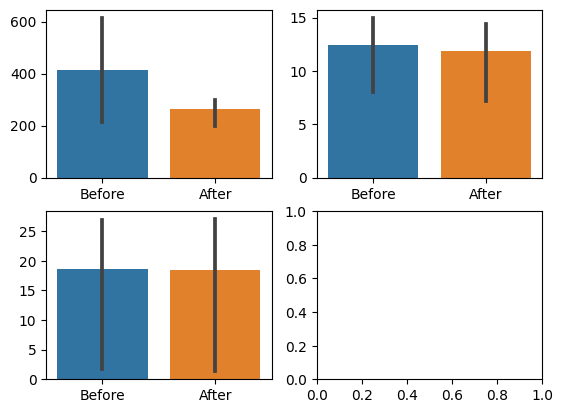

In [ ]:
plt.subplot(221)
sn.barplot(data=df_diameter)

plt.subplot(222)
sn.barplot(data=df_velocity)

plt.subplot(223)
sn.barplot(data=df_price)

plt.subplot(224)
sn.barplot(data=df_land)